In [1]:
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
df1 = pd.read_csv('라벨붙임.csv', encoding="cp949")
df1

,Unnamed: 0,고객번호,A_구매금액,기타CV_S,식료품_NET,의류_NET,생활_NET,RFM등급,휴일_CV_S,편의품_CV_S,선매품CV_S,객단가증감률,B_구매금액,C_구매금액,kmeans_label
0,0,1,1.367753,-0.840909,-0.144455,0.238970,-3.296500,-1.739425,-0.015794,0.382423,-0.803469,-0.912943,-0.214188,-0.135190,2
1,1,2,1.776146,0.201445,-0.144455,1.282634,-0.051626,-0.792279,-0.488643,0.298866,-0.848143,-0.912943,-0.234609,-0.205711,2
2,2,3,-0.496782,-1.569289,-0.144455,0.238970,-0.051626,-0.034562,0.466305,0.071407,2.538651,-0.203346,-0.242069,0.018349,0
3,3,4,-0.170812,-0.657451,-0.144455,0.238970,-0.862844,1.291443,0.288886,-0.329763,-0.532511,-0.912943,-0.181465,-0.146886,1
4,8,10,-0.400193,-0.190214,-0.144455,0.238970,-0.051626,-0.981708,-1.060247,-1.245738,-0.327869,-0.203346,-0.145213,0.632941,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10743,18854,19325,-0.207098,0.126255,-0.144455,0.238970,-0.862844,0.723155,0.657320,1.350886,0.234927,0.506252,-0.222418,-0.205096,2
10744,18855,19327,-0.498162,2.347770,-0.144455,1.282634,-0.051626,-0.413420,-0.014097,0.781941,2.607661,-0.912943,-0.239206,0.324242,0
10745,18860,19332,-0.493328,2.347770,0.854647,1.282634,-0.051626,0.533726,0.430470,0.248380,1.333528,1.215849,-0.234873,0.748546,0
10746,18861,19333,-0.438943,-0.713786,-0.144455,-0.804693,-0.862844,1.291443,-0.587946,0.875390,1.377105,-0.912943,-0.202690,-0.203839,0


In [84]:
df1 = pd.read_csv('1-7기최종.csv', encoding="cp949")
df1

,고객번호,증감확인,성별,연령대,이용횟수,경쟁사이용횟수,멤버쉽보유,RFM,매출변동지수,매출증감지수,...,A제휴사(%),B제휴사(%),C제휴사(%),D제휴사(%),편의품(%),선매품(%),전문품(%),기타(%),평일_CV_S,RFM등급
0,1,0,2.154912,1.998566,-0.423501,3.785326,-0.703766,7,-1.269326,0.461569,...,0.390612,-0.420830,-0.004591,-0.285059,-0.637370,-0.815035,1.182401,-0.830928,0.423597,1.4
1,2,0,2.154912,1.998566,-0.423501,1.829441,-0.703766,7,-0.742090,0.461569,...,0.167687,-0.303073,-0.704472,1.315183,-0.521035,-0.557374,0.792623,-0.491442,0.444984,1.4
2,3,1,2.154912,1.998566,-0.423501,-0.405857,-0.703766,6,-1.532943,0.000000,...,0.813860,-0.720745,-0.435429,-0.285059,-0.458670,1.828343,-0.799093,-0.988326,0.497385,3.2
3,4,1,-0.464056,1.998566,-0.423501,0.432380,-0.703766,8,0.839617,-0.461569,...,-0.529452,0.484433,0.550137,-0.285059,-0.029309,1.144128,-0.799093,-0.134056,0.374816,3.0
4,6,1,-0.464056,1.998566,-0.423501,-0.405857,-0.703766,10,-1.269326,-0.461569,...,-0.260879,-0.328832,1.215811,-0.285059,-0.392706,0.040430,0.295754,-0.471690,0.206672,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18873,19333,0,-0.464056,-2.144283,-0.085040,-0.405857,1.420926,7,-1.005708,0.000000,...,-2.093917,-0.058970,-0.058214,7.319088,0.963737,0.242709,-0.799093,0.771446,0.338248,3.5
18874,19334,0,2.154912,-1.108571,-0.423501,7.976510,1.420926,7,1.366852,0.461569,...,-3.293192,3.374408,1.959146,-0.285059,1.231188,0.272560,-0.799093,0.586889,0.547131,2.0
18875,19335,1,-0.464056,-1.108571,-0.423501,-0.405857,1.420926,8,0.839617,-2.307845,...,0.709267,-0.577228,-0.433580,-0.285059,0.920561,0.084813,-0.799093,1.041800,0.322498,2.5
18876,19336,1,-0.464056,-1.108571,-0.423501,-0.405857,-0.703766,5,0.575999,-2.769414,...,0.549718,-0.991833,-0.704472,1.706254,0.205760,-0.748656,0.865613,-0.715503,0.562213,2.1


In [104]:
df2 = pd.read_csv('1-8기최종.csv', encoding="cp949")
df2

,고객번호,증감확인,성별,연령대,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,RFM,매출변동지수,매출증감지수,...,의류잡화CV_S,화장품CV_S,문구류CV_S,가구류CV_S,레저취미CV_S,전자제품CV_S,도서음반CV_S,차량용품CV_S,평일_CV_S,RFM등급
0,1,0,2.156039,1.998229,3.784157,-0.652472,-0.424659,7,0.438791,-1.388013,...,-1.448342,-0.363105,-1.323632,0.736138,0.279975,0.588740,-0.624613,-0.783590,0.395231,1.4
1,2,0,2.156039,1.998229,1.828781,-0.652472,-0.424659,9,0.000000,-0.690965,...,-0.595789,-1.006358,-1.323632,-0.123062,-1.159604,-0.158214,-0.624613,-0.783590,0.406046,1.9
2,3,0,2.156039,1.998229,-0.405935,-0.652472,-0.424659,4,0.000000,-1.620363,...,3.432013,-1.692524,-1.323632,-1.625508,-1.815644,1.170227,-0.624613,-0.783590,0.478116,2.3
3,4,0,-0.463814,1.998229,0.432083,-0.652472,-0.424659,8,-0.877582,0.703133,...,-0.464030,0.206798,-1.323632,0.088640,0.268642,-1.264607,-0.624613,-0.783590,0.340325,3.0
4,6,1,-0.463814,1.998229,-0.405935,-0.652472,-0.424659,10,-0.877582,-1.155664,...,-0.711152,-0.852221,1.633736,0.731873,1.163341,-1.264607,-0.624613,-0.783590,0.209983,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,0,-0.463814,-2.144017,-0.405935,1.068660,-0.084953,4,0.000000,-1.155664,...,3.432013,-1.692524,0.585925,-1.625508,1.588049,-1.264607,-0.624613,-0.783590,0.393772,3.0
18862,19334,0,2.156039,-1.108456,7.974248,1.068660,-0.424659,7,0.438791,0.935482,...,0.751998,0.258188,-0.084726,0.181109,-0.557044,1.170227,0.637271,1.621021,0.706642,1.6
18863,19335,1,-0.463814,-1.108456,-0.405935,1.068660,-0.424659,9,-0.877582,1.167832,...,-0.465980,-0.157816,-0.945261,-0.684492,-0.032609,-1.264607,0.242607,0.707541,0.311325,2.8
18864,19336,1,-0.463814,-1.108456,-0.405935,-0.652472,-0.424659,5,-3.510330,0.703133,...,-0.477107,-0.063757,-1.323632,1.303824,-1.815644,-1.264607,-0.624613,-0.783590,0.627707,1.9


In [117]:
df2

,고객번호,증감확인,성별,연령대,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,매출변동지수,매출증감지수,매출변동계수,...,의류잡화CV_S,화장품CV_S,문구류CV_S,가구류CV_S,레저취미CV_S,전자제품CV_S,도서음반CV_S,차량용품CV_S,평일_CV_S,RFM등급
0,1,0,2.156039,1.998229,3.784157,-0.652472,-0.424659,0.438791,-1.388013,0.412112,...,-1.448342,-0.363105,-1.323632,0.736138,0.279975,0.588740,-0.624613,-0.783590,0.395231,1.4
1,2,0,2.156039,1.998229,1.828781,-0.652472,-0.424659,0.000000,-0.690965,0.309139,...,-0.595789,-1.006358,-1.323632,-0.123062,-1.159604,-0.158214,-0.624613,-0.783590,0.406046,1.9
2,3,0,2.156039,1.998229,-0.405935,-0.652472,-0.424659,0.000000,-1.620363,0.397417,...,3.432013,-1.692524,-1.323632,-1.625508,-1.815644,1.170227,-0.624613,-0.783590,0.478116,2.3
3,4,0,-0.463814,1.998229,0.432083,-0.652472,-0.424659,-0.877582,0.703133,0.376658,...,-0.464030,0.206798,-1.323632,0.088640,0.268642,-1.264607,-0.624613,-0.783590,0.340325,3.0
4,6,1,-0.463814,1.998229,-0.405935,-0.652472,-0.424659,-0.877582,-1.155664,0.187169,...,-0.711152,-0.852221,1.633736,0.731873,1.163341,-1.264607,-0.624613,-0.783590,0.209983,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,0,-0.463814,-2.144017,-0.405935,1.068660,-0.084953,0.000000,-1.155664,0.353062,...,3.432013,-1.692524,0.585925,-1.625508,1.588049,-1.264607,-0.624613,-0.783590,0.393772,3.0
18862,19334,0,2.156039,-1.108456,7.974248,1.068660,-0.424659,0.438791,0.935482,0.629829,...,0.751998,0.258188,-0.084726,0.181109,-0.557044,1.170227,0.637271,1.621021,0.706642,1.6
18863,19335,1,-0.463814,-1.108456,-0.405935,1.068660,-0.424659,-0.877582,1.167832,0.316218,...,-0.465980,-0.157816,-0.945261,-0.684492,-0.032609,-1.264607,0.242607,0.707541,0.311325,2.8
18864,19336,1,-0.463814,-1.108456,-0.405935,-0.652472,-0.424659,-3.510330,0.703133,0.464145,...,-0.477107,-0.063757,-1.323632,1.303824,-1.815644,-1.264607,-0.624613,-0.783590,0.627707,1.9


In [5]:
plt.rcParams['font.family'] = 'Malgun Gothic'

<AxesSubplot:>

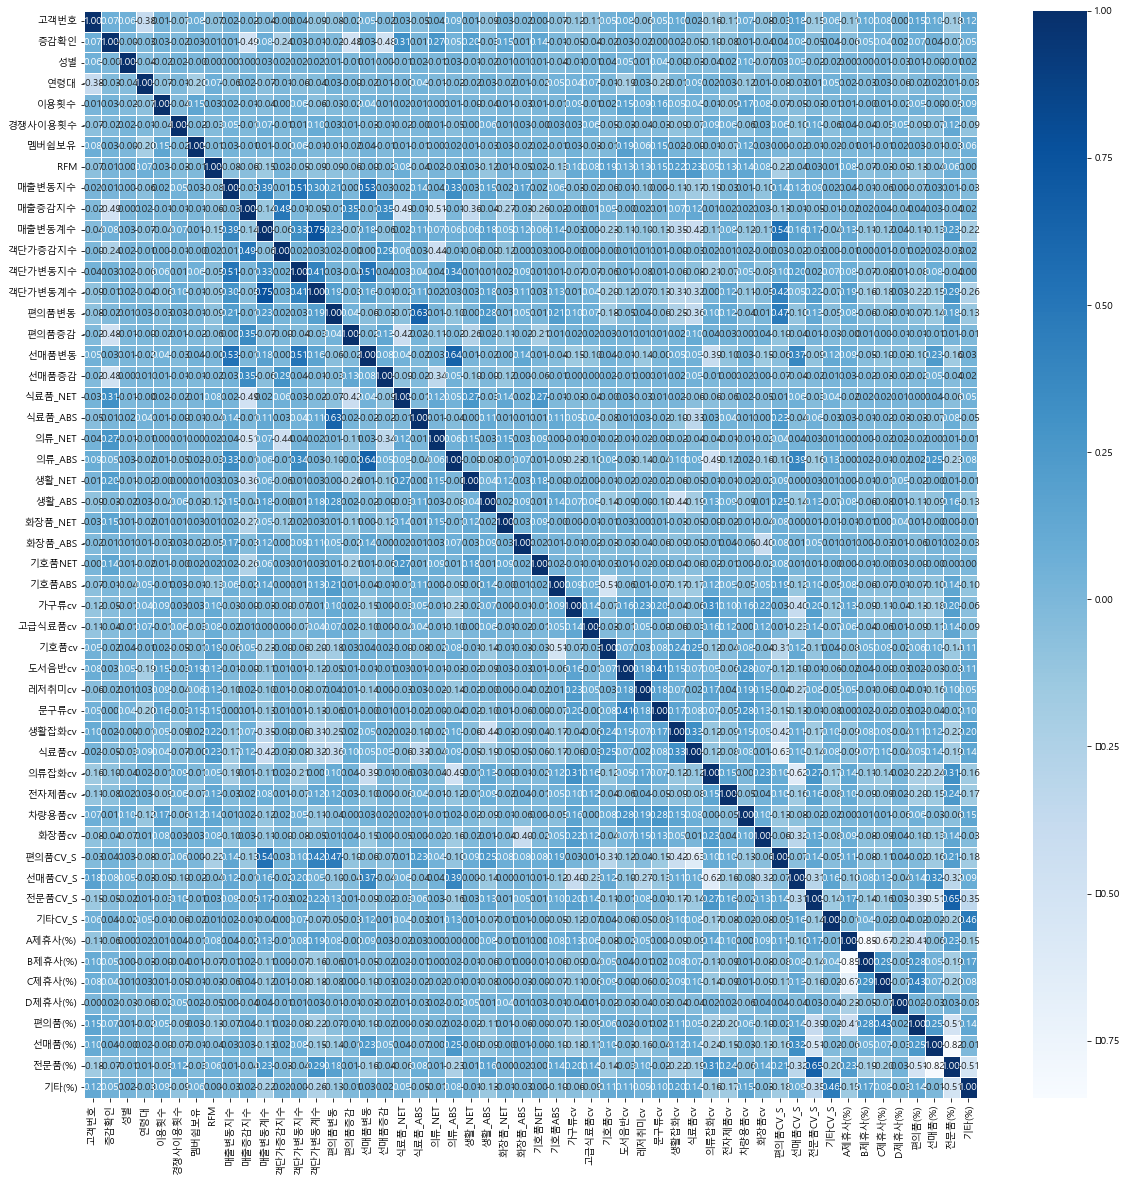

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(data =df1.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
# plt.figure(figsize=(20,20))
# sns.heatmap(data =df2.corr(), annot=True, 
# fmt = '.2f', linewidths=.5, cmap='Blues')

In [112]:
X_train=df1.drop(['고객번호','증감확인'],axis=1)

y_train=df1[['증감확인']]

X_test=df2.drop(['고객번호','증감확인'],axis=1)

y_test=df2[['증감확인']]


In [113]:
rf_clf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rf_clf.fit(X_train,y_train)
# pred = rf_clf.predict(X_test)
# accuracy = accuracy_score(y_test,pred)

# params = {
#     'n_estimators':[10,50,100],
#     'max_depth' : [6,8,10,12],
#    'min_samples_leaf' : [8,12,18],
#     'min_samples_split' : [8,14,20]
# }
# grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1)
# grid_cv.fit(X_train,y_train)

# print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
# print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))
print(accuracy_score(y_train,rf_clf.predict(X_train)))
print(accuracy_score(y_test,rf_clf.predict(X_test)))

1.0
0.641948478744832


In [114]:
lgbm = LGBMClassifier(n_estimators=400)
evals = [(X_test,y_test)]
lgbm.fit(X_train, y_train, eval_set=evals,verbose=False)

print(accuracy_score(y_train,lgbm.predict(X_train)))
print(accuracy_score(y_test,lgbm.predict(X_test)))

0.9945968852632694
0.616028834941164


In [108]:
df1.columns

Index(['고객번호', '증감확인', '성별', '연령대', '이용횟수', '경쟁사이용횟수', '멤버쉽보유', 'RFM',
       '매출변동지수', '매출증감지수', '매출변동계수', '객단가증감지수', '객단가변동지수', '객단가변동계수', '편의품변동',
       '편의품증감', '선매품변동', '선매품증감', '식료품_NET', '식료품_ABS', '의류_NET', '의류_ABS',
       '생활_NET', '생활_ABS', '화장품_NET', '화장품_ABS', '기호품NET', '기호품ABS', '가구류cv',
       '고급식료품cv', '기호품cv', '도서음반cv', '레저취미cv', '문구류cv', '생활잡화cv', '식료품cv',
       '의류잡화cv', '전자제품cv', '차량용품cv', '화장품cv', '편의품CV_S', '선매품CV_S', '전문품CV_S',
       '기타CV_S', 'A제휴사(%)', 'B제휴사(%)', 'C제휴사(%)', 'D제휴사(%)', '편의품(%)',
       '선매품(%)', '전문품(%)', '기타(%)', '평일_CV_S', 'RFM등급'],
      dtype='object')

In [25]:
# '식료품_ABS', '의류_NET', '의류_ABS','생활_NET', '생활_ABS', '화장품_NET', '화장품_ABS', '기호품NET', '기호품ABS'
# 빼고 만듬   
df3 = df1.drop(['식료품_ABS', '의류_NET', '의류_ABS','생활_NET', '생활_ABS', '화장품_NET', '화장품_ABS', '기호품NET', '기호품ABS'],axis=1)

In [28]:
df4 = df2.drop(['식료품_ABS', '의류_NET', '의류_ABS','생활_NET', '생활_ABS', '화장품_NET', '화장품_ABS', '기호품_NET', '기호품_ABS'],axis=1)

In [30]:
X_train=df3.drop(['고객번호','증감확인'],axis=1)

y_train=df3[['증감확인']]

X_test=df4.drop(['고객번호','증감확인'],axis=1)

y_test=df4[['증감확인']]

In [31]:
rf_clf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rf_clf.fit(X_train,y_train)
# pred = rf_clf.predict(X_test)
# accuracy = accuracy_score(y_test,pred)

# params = {
#     'n_estimators':[10,50,100],
#     'max_depth' : [6,8,10,12],
#    'min_samples_leaf' : [8,12,18],
#     'min_samples_split' : [8,14,20]
# }
# grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1)
# grid_cv.fit(X_train,y_train)

# print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
# print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))
print(accuracy_score(y_train,rf_clf.predict(X_train)))
print(accuracy_score(y_test,rf_clf.predict(X_test)))

1.0
0.6332025866638397


In [32]:
lgbm = LGBMClassifier(n_estimators=400)
evals = [(X_test,y_test)]
lgbm.fit(X_train, y_train, eval_set=evals,verbose=False)

print(accuracy_score(y_train,lgbm.predict(X_train)))
print(accuracy_score(y_test,lgbm.predict(X_test)))

0.9916304693293782
0.6186791052687374


In [33]:
df1.columns

Index(['고객번호', '증감확인', '성별', '연령대', '이용횟수', '경쟁사이용횟수', '멤버쉽보유', 'RFM',
       '매출변동지수', '매출증감지수', '매출변동계수', '객단가증감지수', '객단가변동지수', '객단가변동계수', '편의품변동',
       '편의품증감', '선매품변동', '선매품증감', '식료품_NET', '식료품_ABS', '의류_NET', '의류_ABS',
       '생활_NET', '생활_ABS', '화장품_NET', '화장품_ABS', '기호품NET', '기호품ABS', '가구류cv',
       '고급식료품cv', '기호품cv', '도서음반cv', '레저취미cv', '문구류cv', '생활잡화cv', '식료품cv',
       '의류잡화cv', '전자제품cv', '차량용품cv', '화장품cv', '편의품CV_S', '선매품CV_S', '전문품CV_S',
       '기타CV_S', 'A제휴사(%)', 'B제휴사(%)', 'C제휴사(%)', 'D제휴사(%)', '편의품(%)',
       '선매품(%)', '전문품(%)', '기타(%)'],
      dtype='object')

In [42]:
# 고급식료품cv', '기호품cv', '도서음반cv', '레저취미cv', '문구류cv', '생활잡화cv', '식료품cv','의류잡화cv', '전자제품cv', '차량용품cv', '화장품cv'
# 빼고 만듬   
df5 = df1.drop(['가구류cv','고급식료품cv', '기호품cv', '도서음반cv', '레저취미cv', '문구류cv', '생활잡화cv', '식료품cv','의류잡화cv', '전자제품cv', '차량용품cv', '화장품cv',],axis=1)

In [41]:
df2.columns

Index(['고객번호', '증감확인', '성별', '연령대', '경쟁사이용횟수', '멤버쉽보유', '온라인이용횟수', 'RFM',
       '매출변동지수', '매출증감지수', '매출변동계수', '객단가증감률', '객단가변동률', '객단가변동계수', '편의품변동',
       '편의품증감', '선매품변동', '선매품증감', '식료품_NET', '식료품_ABS', '의류_NET', '의류_ABS',
       '생활_NET', '생활_ABS', '화장품_NET', '화장품_ABS', '기호품_NET', '기호품_ABS',
       'A구매비율(%)', 'B구매비율(%)', 'C구매비율(%)', 'D구매비율(%)', '편의품구매비율(%)',
       '선매품구매비율(%)', '전문품구매비율(%)', '기타품구매비율(%)', '편의품_CV_S', '선매품CV_S',
       '전문품CV_S', '기타CV_S', '생활잡화CV_S', '식료품CV_S', '고급식료품CV_S', '기호품CV_S',
       '의류잡화CV_S', '화장품CV_S', '문구류CV_S', '가구류CV_S', '레저취미CV_S', '전자제품CV_S',
       '도서음반CV_S', '차량용품CV_S'],
      dtype='object')

In [43]:
df6 = df2.drop(['생활잡화CV_S', '식료품CV_S', '고급식료품CV_S', '기호품CV_S',
       '의류잡화CV_S', '화장품CV_S', '문구류CV_S', '가구류CV_S', '레저취미CV_S', '전자제품CV_S',
       '도서음반CV_S', '차량용품CV_S'],axis=1)

In [44]:
X_train=df5.drop(['고객번호','증감확인'],axis=1)

y_train=df5[['증감확인']]

X_test=df6.drop(['고객번호','증감확인'],axis=1)

y_test=df6[['증감확인']]

In [45]:
rf_clf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rf_clf.fit(X_train,y_train)
# pred = rf_clf.predict(X_test)
# accuracy = accuracy_score(y_test,pred)

# params = {
#     'n_estimators':[10,50,100],
#     'max_depth' : [6,8,10,12],
#    'min_samples_leaf' : [8,12,18],
#     'min_samples_split' : [8,14,20]
# }
# grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1)
# grid_cv.fit(X_train,y_train)

# print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
# print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))
print(accuracy_score(y_train,rf_clf.predict(X_train)))
print(accuracy_score(y_test,rf_clf.predict(X_test)))

1.0
0.641047386833457


In [46]:
lgbm = LGBMClassifier(n_estimators=400)
evals = [(X_test,y_test)]
lgbm.fit(X_train, y_train, eval_set=evals,verbose=False)

print(accuracy_score(y_train,lgbm.predict(X_train)))
print(accuracy_score(y_test,lgbm.predict(X_test)))

0.9861743828795423
0.6390331813845013


# df1,df2 에서 지영이가 준 RFM테이블 넣고 돌린거

In [118]:
X_train=df1.drop(['고객번호','증감확인'],axis=1)

y_train=df1[['증감확인']]

X_test=df2.drop(['고객번호','증감확인'],axis=1)

y_test=df2[['증감확인']]

In [119]:
rf_clf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rf_clf.fit(X_train,y_train)

print(accuracy_score(y_train,rf_clf.predict(X_train)))
print(accuracy_score(y_test,rf_clf.predict(X_test)))

1.0
0.6449697869182657


In [120]:
lgbm = LGBMClassifier(n_estimators=400)
evals = [(X_test,y_test)]
lgbm.fit(X_train, y_train, eval_set=evals,verbose=False)

print(accuracy_score(y_train,lgbm.predict(X_train)))
print(accuracy_score(y_test,lgbm.predict(X_test)))

0.9945968852632694
0.616028834941164


In [121]:
df1.columns

Index(['고객번호', '증감확인', '성별', '연령대', '이용횟수', '경쟁사이용횟수', '멤버쉽보유', '매출변동지수',
       '매출증감지수', '매출변동계수', '객단가증감지수', '객단가변동지수', '객단가변동계수', '편의품변동', '편의품증감',
       '선매품변동', '선매품증감', '식료품_NET', '식료품_ABS', '의류_NET', '의류_ABS', '생활_NET',
       '생활_ABS', '화장품_NET', '화장품_ABS', '기호품NET', '기호품ABS', '가구류cv', '고급식료품cv',
       '기호품cv', '도서음반cv', '레저취미cv', '문구류cv', '생활잡화cv', '식료품cv', '의류잡화cv',
       '전자제품cv', '차량용품cv', '화장품cv', '편의품CV_S', '선매품CV_S', '전문품CV_S', '기타CV_S',
       'A제휴사(%)', 'B제휴사(%)', 'C제휴사(%)', 'D제휴사(%)', '편의품(%)', '선매품(%)',
       '전문품(%)', '기타(%)', '평일_CV_S', 'RFM등급'],
      dtype='object')

# 대분류증감,변동 뺀것

In [122]:
df7 = df1.drop(['편의품변동', '편의품증감','선매품변동', '선매품증감'],axis=1)

In [123]:
df8 = df2.drop(['편의품변동', '편의품증감','선매품변동', '선매품증감'],axis=1)

In [124]:
X_train=df7.drop(['고객번호','증감확인'],axis=1)

y_train=df7[['증감확인']]

X_test=df8.drop(['고객번호','증감확인'],axis=1)

y_test=df8[['증감확인']]

In [125]:
rf_clf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rf_clf.fit(X_train,y_train)

print(accuracy_score(y_train,rf_clf.predict(X_train)))
print(accuracy_score(y_test,rf_clf.predict(X_test)))

1.0
0.527509806000212


In [126]:
lgbm = LGBMClassifier(n_estimators=400)
evals = [(X_test,y_test)]
lgbm.fit(X_train, y_train, eval_set=evals,verbose=False)

print(accuracy_score(y_train,lgbm.predict(X_train)))
print(accuracy_score(y_test,lgbm.predict(X_test)))

0.9647738107850408
0.50577758931411


# 대분류 비율 뺀것

In [128]:
df9 = df1.drop(['편의품(%)', '선매품(%)','전문품(%)', '기타(%)'],axis=1)

In [132]:
df10 = df2.drop(['편의품구매비율(%)', '선매품구매비율(%)',
       '전문품구매비율(%)', '기타품구매비율(%)'],axis=1)

In [133]:
X_train=df9.drop(['고객번호','증감확인'],axis=1)

y_train=df9[['증감확인']]

X_test=df10.drop(['고객번호','증감확인'],axis=1)

y_test=df10[['증감확인']]

In [134]:
rf_clf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rf_clf.fit(X_train,y_train)

print(accuracy_score(y_train,rf_clf.predict(X_train)))
print(accuracy_score(y_test,rf_clf.predict(X_test)))

1.0
0.6387681543517438


In [135]:
lgbm = LGBMClassifier(n_estimators=400)
evals = [(X_test,y_test)]
lgbm.fit(X_train, y_train, eval_set=evals,verbose=False)

print(accuracy_score(y_train,lgbm.predict(X_train)))
print(accuracy_score(y_test,lgbm.predict(X_test)))

0.9916304693293782
0.6314534082476413


# 제휴사 비율

In [138]:
df11 = df1.drop(['A제휴사(%)', 'B제휴사(%)', 'C제휴사(%)', 'D제휴사(%)'],axis=1)

In [140]:
df12 = df2.drop(['A구매비율(%)','B구매비율(%)', 'C구매비율(%)', 'D구매비율(%)'],axis=1)

In [141]:
X_train=df11.drop(['고객번호','증감확인'],axis=1)

y_train=df11[['증감확인']]

X_test=df12.drop(['고객번호','증감확인'],axis=1)

y_test=df12[['증감확인']]

In [142]:
rf_clf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rf_clf.fit(X_train,y_train)

print(accuracy_score(y_train,rf_clf.predict(X_train)))
print(accuracy_score(y_test,rf_clf.predict(X_test)))

1.0
0.6403053111417365


In [143]:
lgbm = LGBMClassifier(n_estimators=400)
evals = [(X_test,y_test)]
lgbm.fit(X_train, y_train, eval_set=evals,verbose=False)

print(accuracy_score(y_train,lgbm.predict(X_train)))
print(accuracy_score(y_test,lgbm.predict(X_test)))

0.9926899035914821
0.6245627053959504


# 제휴사,대분류 비율 같이 뺀것

In [144]:
df13 = df1.drop(['A제휴사(%)', 'B제휴사(%)', 'C제휴사(%)', 'D제휴사(%)','편의품(%)', '선매품(%)','전문품(%)', '기타(%)'],axis=1)

In [145]:
df14 = df2.drop(['A구매비율(%)','B구매비율(%)', 'C구매비율(%)', 'D구매비율(%)','편의품구매비율(%)', '선매품구매비율(%)',
       '전문품구매비율(%)', '기타품구매비율(%)'],axis=1)

In [147]:
X_train=df13.drop(['고객번호','증감확인'],axis=1)

y_train=df13[['증감확인']]

X_test=df14.drop(['고객번호','증감확인'],axis=1)

y_test=df14[['증감확인']]

In [148]:
rf_clf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rf_clf.fit(X_train,y_train)

print(accuracy_score(y_train,rf_clf.predict(X_train)))
print(accuracy_score(y_test,rf_clf.predict(X_test)))

1.0
0.6431676030955158


In [152]:
lgbm = LGBMClassifier(n_estimators=400)
evals = [(X_test,y_test)]
lgbm.fit(X_train, y_train, eval_set=evals,verbose=False)

print(accuracy_score(y_train,lgbm.predict(X_train)))
print(accuracy_score(y_test,lgbm.predict(X_test)))

0.9906769784934845
0.6153397646559949


In [169]:
X_train=df1.drop(['고객번호','증감확인'],axis=1)

y_train=df1[['증감확인']]

X_test=df2.drop(['고객번호','증감확인'],axis=1)

y_test=df2[['증감확인']]

In [170]:
rf_clf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rf_clf.fit(X_train,y_train)

print(accuracy_score(y_train,rf_clf.predict(X_train)))
print(accuracy_score(y_test,rf_clf.predict(X_test)))

1.0
0.6431676030955158


In [171]:
lgbm = LGBMClassifier(n_estimators=400)
evals = [(X_test,y_test)]
lgbm.fit(X_train, y_train, eval_set=evals,verbose=False)

print(accuracy_score(y_train,lgbm.predict(X_train)))
print(accuracy_score(y_test,lgbm.predict(X_test)))

0.9940671681322174
0.6141206403053111


# net만 빼고 돌림

In [176]:
df15 = df1.drop(['식료품_NET', '의류_NET', '생활_NET', '화장품_NET','기호품NET', 'NET_A','NET_B', 'NET_C'],axis=1)

In [178]:
df16 = df2.drop(['식료품_NET', '의류_NET', '생활_NET', '화장품_NET','기호품_NET', 'NET_A','NET_B', 'NET_C'],axis=1)

In [179]:
X_train=df15.drop(['고객번호','증감확인'],axis=1)

y_train=df15[['증감확인']]

X_test=df16.drop(['고객번호','증감확인'],axis=1)

y_test=df16[['증감확인']]

In [180]:
rf_clf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rf_clf.fit(X_train,y_train)

print(accuracy_score(y_train,rf_clf.predict(X_train)))
print(accuracy_score(y_test,rf_clf.predict(X_test)))

1.0
0.634474716421075


In [181]:
lgbm = LGBMClassifier(n_estimators=400)
evals = [(X_test,y_test)]
lgbm.fit(X_train, y_train, eval_set=evals,verbose=False)

print(accuracy_score(y_train,lgbm.predict(X_train)))
print(accuracy_score(y_test,lgbm.predict(X_test)))

0.9937493378535862
0.6094031591222304


In [182]:
df1.columns

Index(['고객번호', '증감확인', '성별', '연령대', '이용횟수', '경쟁사이용횟수', '멤버쉽보유', '매출변동지수',
       '매출증감지수', '매출변동계수', '객단가증감지수', '객단가변동지수', '객단가변동계수', '편의품변동', '편의품증감',
       '선매품변동', '선매품증감', '식료품_NET', '식료품_ABS', '의류_NET', '의류_ABS', '생활_NET',
       '생활_ABS', '화장품_NET', '화장품_ABS', '기호품NET', '기호품ABS', '가구류cv', '고급식료품cv',
       '기호품cv', '도서음반cv', '레저취미cv', '문구류cv', '생활잡화cv', '식료품cv', '의류잡화cv',
       '전자제품cv', '차량용품cv', '화장품cv', '편의품CV_S', '선매품CV_S', '전문품CV_S', '기타CV_S',
       'A제휴사(%)', 'B제휴사(%)', 'C제휴사(%)', 'D제휴사(%)', '편의품(%)', '선매품(%)',
       '전문품(%)', '기타(%)', '평일_CV_S', 'RFM등급', 'NET_A', 'ABS_A', 'NET_B',
       'ABS_B', 'NET_C', 'ABS_C'],
      dtype='object')

# ABS만 빼고 돌림

In [183]:
df17 = df1.drop(['식료품_ABS', '의류_ABS', '생활_ABS', '화장품_ABS','기호품ABS', 'ABS_A','ABS_B', 'ABS_C'],axis=1)

In [191]:
df18 = df2.drop(['식료품_ABS', '의류_ABS', '생활_ABS', '화장품_ABS','기호품_ABS', 'ABS_A','ABS_B', 'ABS_C'],axis=1)

In [192]:
X_train=df17.drop(['고객번호','증감확인'],axis=1)

y_train=df17[['증감확인']]

X_test=df18.drop(['고객번호','증감확인'],axis=1)

y_test=df18[['증감확인']]

In [193]:
rf_clf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rf_clf.fit(X_train,y_train)

print(accuracy_score(y_train,rf_clf.predict(X_train)))
print(accuracy_score(y_test,rf_clf.predict(X_test)))

1.0
0.6466659599279126


In [194]:
lgbm = LGBMClassifier(n_estimators=400)
evals = [(X_test,y_test)]
lgbm.fit(X_train, y_train, eval_set=evals,verbose=False)

print(accuracy_score(y_train,lgbm.predict(X_train)))
print(accuracy_score(y_test,lgbm.predict(X_test)))

0.9928488187307978
0.6210643485635535


In [195]:
df19 = df1.drop(['식료품_ABS', '의류_ABS', '생활_ABS', '화장품_ABS','기호품ABS'],axis=1)

In [196]:
df20 = df2.drop(['식료품_ABS', '의류_ABS', '생활_ABS', '화장품_ABS','기호품_ABS'],axis=1)

In [197]:
X_train=df19.drop(['고객번호','증감확인'],axis=1)

y_train=df19[['증감확인']]

X_test=df20.drop(['고객번호','증감확인'],axis=1)

y_test=df20[['증감확인']]

In [198]:
rf_clf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rf_clf.fit(X_train,y_train)

print(accuracy_score(y_train,rf_clf.predict(X_train)))
print(accuracy_score(y_test,rf_clf.predict(X_test)))

1.0
0.6420544895579349


In [199]:
lgbm = LGBMClassifier(n_estimators=400)
evals = [(X_test,y_test)]
lgbm.fit(X_train, y_train, eval_set=evals,verbose=False)

print(accuracy_score(y_train,lgbm.predict(X_train)))
print(accuracy_score(y_test,lgbm.predict(X_test)))

0.9940141964191122
0.6188911268949433


In [200]:
df1.columns

Index(['고객번호', '증감확인', '성별', '연령대', '이용횟수', '경쟁사이용횟수', '멤버쉽보유', '매출변동지수',
       '매출증감지수', '매출변동계수', '객단가증감지수', '객단가변동지수', '객단가변동계수', '편의품변동', '편의품증감',
       '선매품변동', '선매품증감', '식료품_NET', '식료품_ABS', '의류_NET', '의류_ABS', '생활_NET',
       '생활_ABS', '화장품_NET', '화장품_ABS', '기호품NET', '기호품ABS', '가구류cv', '고급식료품cv',
       '기호품cv', '도서음반cv', '레저취미cv', '문구류cv', '생활잡화cv', '식료품cv', '의류잡화cv',
       '전자제품cv', '차량용품cv', '화장품cv', '편의품CV_S', '선매품CV_S', '전문품CV_S', '기타CV_S',
       'A제휴사(%)', 'B제휴사(%)', 'C제휴사(%)', 'D제휴사(%)', '편의품(%)', '선매품(%)',
       '전문품(%)', '기타(%)', '평일_CV_S', 'RFM등급', 'NET_A', 'ABS_A', 'NET_B',
       'ABS_B', 'NET_C', 'ABS_C'],
      dtype='object')

In [201]:
df21 = df1.drop(['객단가변동계수', '매출변동계수'],axis=1)

In [202]:
df22 = df2.drop(['객단가변동계수', '매출변동계수'],axis=1)

In [203]:
X_train=df19.drop(['고객번호','증감확인'],axis=1)

y_train=df19[['증감확인']]

X_test=df20.drop(['고객번호','증감확인'],axis=1)

y_test=df20[['증감확인']]

In [204]:
rf_clf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rf_clf.fit(X_train,y_train)

print(accuracy_score(y_train,rf_clf.predict(X_train)))
print(accuracy_score(y_test,rf_clf.predict(X_test)))

1.0
0.6422135057775893


In [205]:
lgbm = LGBMClassifier(n_estimators=400)
evals = [(X_test,y_test)]
lgbm.fit(X_train, y_train, eval_set=evals,verbose=False)

print(accuracy_score(y_train,lgbm.predict(X_train)))
print(accuracy_score(y_test,lgbm.predict(X_test)))

0.9940141964191122
0.6188911268949433


In [ ]:
'고객번호', '증감확인', '성별', '연령대', '경쟁사이용횟수', '멤버쉽보유', '온라인이용횟수','RFM'
'A구매비율(%)', 'B구매비율(%)', 'C구매비율(%)', 'D구매비율(%)'
'선매품구매비율(%)', '전문품구매비율(%)', '기타품구매비율(%)'
'편의품_CV_S','선매품CV_S', '전문품CV_S', '기타CV_S',
 '생활잡화CV_S', '식료품CV_S', '고급식료품CV_S','기호품CV_S', '의류잡화CV_S',
 '화장품CV_S', '문구류CV_S', '가구류CV_S', '레저취미CV_S','전자제품CV_S', '도서음반CV_S', '차량용품CV_S'
'평일CV','휴일CV','분기변동지수', '객단가변동지수'

In [207]:
df2.columns

Index(['고객번호', '증감확인', '성별', '연령대', '경쟁사이용횟수', '멤버쉽보유', '온라인이용횟수', '매출변동지수',
       '매출증감지수', '매출변동계수', '객단가증감률', '객단가변동률', '객단가변동계수', '편의품변동', '편의품증감',
       '선매품변동', '선매품증감', '식료품_NET', '식료품_ABS', '의류_NET', '의류_ABS', '생활_NET',
       '생활_ABS', '화장품_NET', '화장품_ABS', '기호품_NET', '기호품_ABS', 'A구매비율(%)',
       'B구매비율(%)', 'C구매비율(%)', 'D구매비율(%)', '편의품구매비율(%)', '선매품구매비율(%)',
       '전문품구매비율(%)', '기타품구매비율(%)', '편의품_CV_S', '선매품CV_S', '전문품CV_S', '기타CV_S',
       '생활잡화CV_S', '식료품CV_S', '고급식료품CV_S', '기호품CV_S', '의류잡화CV_S', '화장품CV_S',
       '문구류CV_S', '가구류CV_S', '레저취미CV_S', '전자제품CV_S', '도서음반CV_S', '차량용품CV_S',
       '평일_CV_S', 'RFM등급', 'NET_A', 'ABS_A', 'NET_B', 'ABS_B', 'NET_C',
       'ABS_C'],
      dtype='object')